# Lab #1

Members: Noam Yan,Yu Wu <br>
Section: AC <br>
Date: 10/06/2020

## 1. A little statistics

### Question 1

1B.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (7,5)

In [2]:
# get the distribution
d = stats.norm.rvs(loc = 5., scale = 0.01, size = 100000)

In [3]:
X = np.array([1.,2.,5.])
prob = .5*scipy.special.erfc(X/(2**.5))
# prob = stats.norm.sf(X)
prob

array([1.58655254e-01, 2.27501319e-02, 2.86651572e-07])

prob represents the the probability of 1sigma,2sigma,and 5sigma. It is controled by the sigma value - X. <br>
It is calculated by the fomula provided in the first lecture. 1 - stats.norm.cdf() works too.

1C.

In [4]:
sigV = scipy.special.erfcinv(prob*2)*(2**.5)
# sigV = stats.norm.isf(prob)
sigV

array([1., 2., 5.])

sigV represents the sigma value of the probability.<br>
Similarly, we can calculate backwards through stats.norm.ppf()

1D. <br>
As for the question about minus sign, I assume you mean the minus sign in "1 - stats.norm.cdf()".It is because the build-in function come up with the area from 0 to the target range, however, what we want is the area behind. The total probability is 1, so we just do subtraction.

### Question 2

2A. Rayleigh 

In [5]:
loc, scale = 5.,0.01
d_r = stats.rayleigh.rvs(loc = loc, scale = scale, size = 100000)

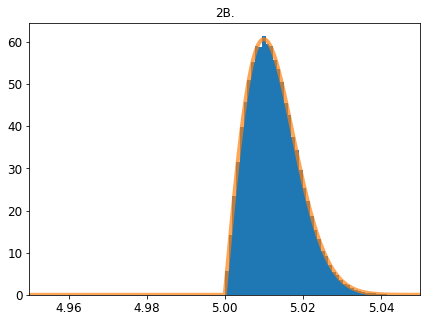

In [6]:
fig, ax = plt.subplots(1, 1)
ax.hist(d_r,50, density=True)
plt.tick_params(labelsize = 12)
plt.xlim([4.95,5.05])
x = np.linspace(4.95,5.05,1000)
ax.plot(x,stats.rayleigh.pdf(x,loc = 5., scale = 0.01),linewidth = 4,alpha = 0.7)
plt.title("2B.")
plt.show()

### Question 3

3A. Assume the hypothetical measurement is 5.025


In [7]:
x_hypo =5.025

3B. My question is:  what is the probability for 5.025 as a signal?

The data point 5.025 is at 2.5σ.

3C. integral of the probability distribution from 5.025 to infinity.

3D.

In [8]:
prob_hypo = 1-stats.rayleigh.cdf(x_hypo,loc, scale)
prob_hypo

0.04393693362340356

The probability is about 0.0439

### Question 4

In [9]:
x_list = np.arange(5,5.04,0.001)

In [10]:
prob_list = 1-stats.rayleigh.cdf(x_list,loc, scale)

In [11]:
import pandas as pd
df = pd.DataFrame({'x':x_list, 'prob': prob_list})
df

,x,prob
0,5.000,1.000000
1,5.001,0.995012
2,5.002,0.980199
3,5.003,0.955997
4,5.004,0.923116
5,5.005,0.882497
6,5.006,0.835270
7,5.007,0.782705
8,5.008,0.726149
9,5.009,0.666977


## 2. Non-continuous distributions

1. I choose Poisson.

1B.

In [12]:
mean = [3,5,7]
size = 100000

In [13]:
d_p = []
for i in range(len(mean)):
    d_p.append(stats.poisson.rvs(mean[i], size=size))

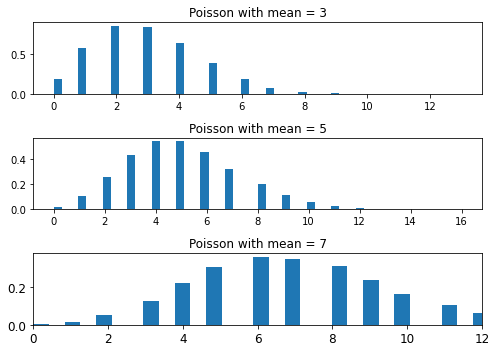

In [14]:
fig, axs = plt.subplots(3)
for i in range(len(mean)):
    axs[i].hist(d_p[i],50, density=True)
    plt.tick_params(labelsize = 12)
    plt.xlim([0,12])
    axs[i].title.set_text('Poisson with mean = %s'%(mean[i]))
    fig.tight_layout()
plt.show()

1C. My question is: What is the probability for 5 as a signal in the Poinsson distribution(mean=3)?

In [15]:
prob_p = 1 - stats.poisson.cdf(5,mean[0],)
prob_p

0.08391794203130343

In [16]:
sigV_p = stats.poisson.ppf(prob_p,mean[0])
sigV

array([1., 2., 5.])

The probability is 0.08 and it is 2.5σ away from the mean.

1D.<br>
I agree. Because the probability relies on the position of data point, and we only calculate the integration of the data behind. Since the data is discrete, in other word, there is no data between two x-values, the probability cannot change between two x-values. Similar to sigmas, which is the distance to the mean.

1E. <br>
As I mentioned above, the discrepancy of distribution will affect on probability and sigmas.<br>
Whereas, the mean is calculated by the total amount, which is not necessary to be perfectly divided by the number of events.For example, the mean of a set [2,3] is 2.5. But I won't say it changes continuously, because selecting the seperation line does not change the mean.